El conjunto de datos se puede obtener a partir del siguiente enlace: https://www.kaggle.com/datasets/pablohfreitas/all-premier-league-matches-20102021?select=df_full_premierleague.csv

Se utilizan las herramientas Panda, Numpy y Seaborn, además de las referentes a Matplotlib para poder graficar.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lectura de datos
df = pd.read_csv('/content/drive/MyDrive/TFM/df_full_premierleague.csv', decimal='.')

Comprobación de los tipos de datos y del número de instancias.

In [ ]:
print("DIMENSIONALIDAD DEL DATAFRAME: \n")
print(df.shape,"\n")
print("TIPOS DE DATOS: \n")
print(df.dtypes,"\n")
print("COLUMNAS: \n")
print(df.columns)

DIMENSIONALIDAD DEL DATAFRAME: 

(4070, 114) 

TIPOS DE DATOS: 

Unnamed: 0                    int64
link_match                   object
season                       object
date                         object
home_team                    object
                             ...   
sg_match_ft_acum_away       float64
goals_scored_ht_avg_away    float64
goals_conced_ht_avg_away    float64
sg_match_ht_acum_away       float64
performance_acum_away       float64
Length: 114, dtype: object 

COLUMNAS: 

Index(['Unnamed: 0', 'link_match', 'season', 'date', 'home_team', 'away_team',
       'result_full', 'result_ht', 'home_clearances', 'home_corners',
       ...
       'tackles_avg_away', 'touches_avg_away', 'yellow_cards_avg_away',
       'goals_scored_ft_avg_away', 'goals_conced_ft_avg_away',
       'sg_match_ft_acum_away', 'goals_scored_ht_avg_away',
       'goals_conced_ht_avg_away', 'sg_match_ht_acum_away',
       'performance_acum_away'],
      dtype='object', length=114)


Comprobación de las variables numéricas del conjunto de datos.

In [ ]:
df_numeric = df.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'home_clearances' 'home_corners' 'home_fouls_conceded'
 'home_offsides' 'home_passes' 'home_possession' 'home_red_cards'
 'home_shots' 'home_shots_on_target' 'home_tackles' 'home_touches'
 'home_yellow_cards' 'away_clearances' 'away_corners'
 'away_fouls_conceded' 'away_offsides' 'away_passes' 'away_possession'
 'away_red_cards' 'away_shots' 'away_shots_on_target' 'away_tackles'
 'away_touches' 'away_yellow_cards' 'goal_home_ft' 'goal_away_ft'
 'sg_match_ft' 'goal_home_ht' 'goal_away_ht' 'sg_match_ht'
 'clearances_avg_H' 'corners_avg_H' 'fouls_conceded_avg_H'
 'offsides_avg_H' 'passes_avg_H' 'possession_avg_H' 'red_cards_avg_H'
 'shots_avg_H' 'shots_on_target_avg_H' 'tackles_avg_H' 'touches_avg_H'
 'yellow_cards_avg_H' 'goals_scored_ft_avg_H' 'goals_conced_ft_avg_H'
 'sg_match_ft_acum_H' 'goals_scored_ht_avg_H' 'goals_conced_ht_avg_H'
 'sg_match_ht_acum_H' 'performance_acum_H' 'clearances_avg_A'
 'corners_avg_A' 'fouls_conceded_avg_A' 'offsides_avg_A' 'passes_avg_A'
 'pos

Comprobación de las variables no numéricas del conjunto de datos.

In [ ]:
df_non_numeric = df.select_dtypes(exclude = [np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['link_match' 'season' 'date' 'home_team' 'away_team' 'result_full'
 'result_ht']


Tratamiento de missing values



In [ ]:
#Porcentaje de missing values en cada columna
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
link_match - 0%
season - 0%
date - 0%
home_team - 0%
away_team - 0%
result_full - 0%
result_ht - 0%
home_clearances - 0%
home_corners - 0%
home_fouls_conceded - 0%
home_offsides - 0%
home_passes - 0%
home_possession - 0%
home_red_cards - 0%
home_shots - 0%
home_shots_on_target - 0%
home_tackles - 0%
home_touches - 0%
home_yellow_cards - 0%
away_clearances - 0%
away_corners - 0%
away_fouls_conceded - 0%
away_offsides - 0%
away_passes - 0%
away_possession - 0%
away_red_cards - 0%
away_shots - 0%
away_shots_on_target - 0%
away_tackles - 0%
away_touches - 0%
away_yellow_cards - 0%
goal_home_ft - 0%
goal_away_ft - 0%
sg_match_ft - 0%
goal_home_ht - 0%
goal_away_ht - 0%
sg_match_ht - 0%
clearances_avg_H - 5%
corners_avg_H - 5%
fouls_conceded_avg_H - 5%
offsides_avg_H - 5%
passes_avg_H - 5%
possession_avg_H - 5%
red_cards_avg_H - 5%
shots_avg_H - 5%
shots_on_target_avg_H - 5%
tackles_avg_H - 5%
touches_avg_H - 5%
yellow_cards_avg_H - 5%
goals_scored_ft_avg_H - 5%
goals_conced_

In [ ]:
# Lista de las columnas a tratar con un 3% de valores nulos
cols_nulos_3 = ['clearances_avg_home', 'corners_avg_home', 'fouls_conceded_avg_home', 'offsides_avg_home', 'passes_avg_home', 'possession_avg_home', 'red_cards_avg_home', 'shots_avg_home',
                'shots_on_target_avg_home', 'tackles_avg_home', 'touches_avg_home', 'yellow_cards_avg_home', 'goals_scored_ft_avg_home', 'goals_conced_ft_avg_home', 'sg_match_ft_acum_home',
                'goals_scored_ht_avg_home', 'goals_conced_ht_avg_home', 'sg_match_ht_acum_home', 'performance_acum_home', 'clearances_avg_away', 'corners_avg_away', 'fouls_conceded_avg_away',
                'offsides_avg_away', 'passes_avg_away', 'possession_avg_away', 'red_cards_avg_away', 'shots_avg_away', 'shots_on_target_avg_away', 'tackles_avg_away', 'touches_avg_away',
                'yellow_cards_avg_away', 'goals_scored_ft_avg_away', 'goals_conced_ft_avg_away', 'sg_match_ft_acum_away', 'goals_scored_ht_avg_away', 'goals_conced_ht_avg_away',
                'sg_match_ht_acum_away', 'performance_acum_away']

for col in cols_nulos_3:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

In [ ]:
#Porcentaje de missing values en cada columna tras rellenar los que tenían un 3% de valores nulos
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
link_match - 0%
season - 0%
date - 0%
home_team - 0%
away_team - 0%
result_full - 0%
result_ht - 0%
home_clearances - 0%
home_corners - 0%
home_fouls_conceded - 0%
home_offsides - 0%
home_passes - 0%
home_possession - 0%
home_red_cards - 0%
home_shots - 0%
home_shots_on_target - 0%
home_tackles - 0%
home_touches - 0%
home_yellow_cards - 0%
away_clearances - 0%
away_corners - 0%
away_fouls_conceded - 0%
away_offsides - 0%
away_passes - 0%
away_possession - 0%
away_red_cards - 0%
away_shots - 0%
away_shots_on_target - 0%
away_tackles - 0%
away_touches - 0%
away_yellow_cards - 0%
goal_home_ft - 0%
goal_away_ft - 0%
sg_match_ft - 0%
goal_home_ht - 0%
goal_away_ht - 0%
sg_match_ht - 0%
clearances_avg_H - 5%
corners_avg_H - 5%
fouls_conceded_avg_H - 5%
offsides_avg_H - 5%
passes_avg_H - 5%
possession_avg_H - 5%
red_cards_avg_H - 5%
shots_avg_H - 5%
shots_on_target_avg_H - 5%
tackles_avg_H - 5%
touches_avg_H - 5%
yellow_cards_avg_H - 5%
goals_scored_ft_avg_H - 5%
goals_conced_

In [ ]:
# Lista de las columnas a tratar con un 5% de valores nulos
cols_nulos_5 = [
    'clearances_avg_H', 'corners_avg_H', 'fouls_conceded_avg_H', 'offsides_avg_H', 'passes_avg_H', 'possession_avg_H', 'red_cards_avg_H', 'shots_avg_H', 'shots_on_target_avg_H',
    'tackles_avg_H', 'touches_avg_H', 'yellow_cards_avg_H', 'goals_scored_ft_avg_H', 'goals_conced_ft_avg_H', 'sg_match_ft_acum_H', 'goals_scored_ht_avg_H', 'goals_conced_ht_avg_H',
    'sg_match_ht_acum_H', 'performance_acum_H', 'clearances_avg_A', 'corners_avg_A', 'fouls_conceded_avg_A', 'offsides_avg_A', 'passes_avg_A', 'possession_avg_A', 'red_cards_avg_A',
    'shots_avg_A', 'shots_on_target_avg_A', 'tackles_avg_A', 'touches_avg_A', 'yellow_cards_avg_A', 'goals_scored_ft_avg_A', 'goals_conced_ft_avg_A', 'sg_match_ft_acum_A',
    'goals_scored_ht_avg_A','goals_conced_ht_avg_A', 'sg_match_ht_acum_A', 'performance_acum_A'
]

for col in cols_nulos_5:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

In [ ]:
#Porcentaje de missing values en cada columna tras rellenar los que tenían un 5% de valores nulos
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
link_match - 0%
season - 0%
date - 0%
home_team - 0%
away_team - 0%
result_full - 0%
result_ht - 0%
home_clearances - 0%
home_corners - 0%
home_fouls_conceded - 0%
home_offsides - 0%
home_passes - 0%
home_possession - 0%
home_red_cards - 0%
home_shots - 0%
home_shots_on_target - 0%
home_tackles - 0%
home_touches - 0%
home_yellow_cards - 0%
away_clearances - 0%
away_corners - 0%
away_fouls_conceded - 0%
away_offsides - 0%
away_passes - 0%
away_possession - 0%
away_red_cards - 0%
away_shots - 0%
away_shots_on_target - 0%
away_tackles - 0%
away_touches - 0%
away_yellow_cards - 0%
goal_home_ft - 0%
goal_away_ft - 0%
sg_match_ft - 0%
goal_home_ht - 0%
goal_away_ht - 0%
sg_match_ht - 0%
clearances_avg_H - 0%
corners_avg_H - 0%
fouls_conceded_avg_H - 0%
offsides_avg_H - 0%
passes_avg_H - 0%
possession_avg_H - 0%
red_cards_avg_H - 0%
shots_avg_H - 0%
shots_on_target_avg_H - 0%
tackles_avg_H - 0%
touches_avg_H - 0%
yellow_cards_avg_H - 0%
goals_scored_ft_avg_H - 0%
goals_conced_

Tratamiento de outliers


<Axes: >

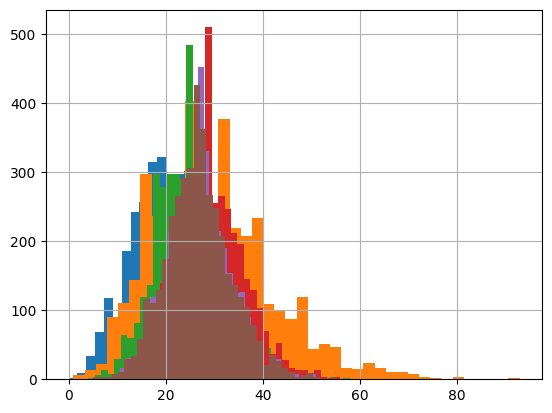

In [ ]:
df['home_clearances'].hist(bins=40)
df['away_clearances'].hist(bins=40)
df['clearances_avg_H'].hist(bins=40)
df['clearances_avg_A'].hist(bins=40)
df['clearances_avg_home'].hist(bins=40)
df['clearances_avg_away'].hist(bins=40)

<Axes: >

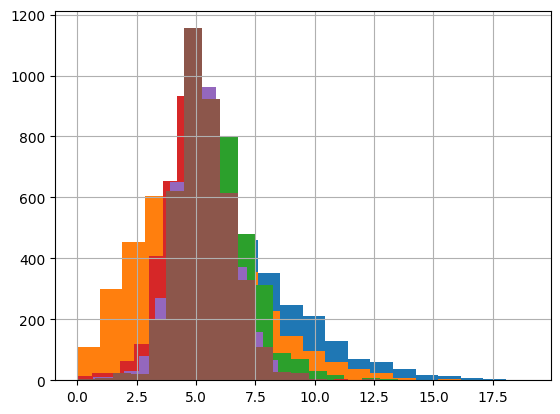

In [ ]:
df['home_corners'].hist(bins=20)
df['away_corners'].hist(bins=20)
df['corners_avg_H'].hist(bins=20)
df['corners_avg_A'].hist(bins=20)
df['corners_avg_home'].hist(bins=20)
df['corners_avg_away'].hist(bins=20)

<Axes: >

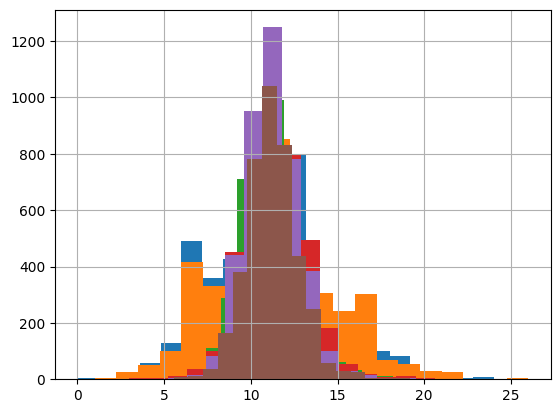

In [ ]:
df['home_fouls_conceded'].hist(bins=20)
df['away_fouls_conceded'].hist(bins=20)
df['fouls_conceded_avg_H'].hist(bins=20)
df['fouls_conceded_avg_A'].hist(bins=20)
df['fouls_conceded_avg_home'].hist(bins=20)
df['fouls_conceded_avg_away'].hist(bins=20)

<Axes: >

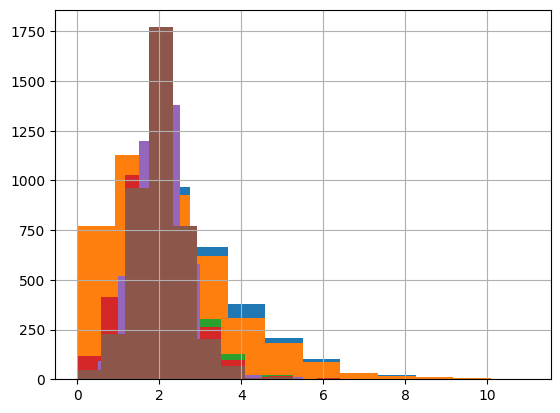

In [ ]:
df['home_offsides'].hist(bins=12)
df['away_offsides'].hist(bins=12)
df['offsides_avg_H'].hist(bins=12)
df['offsides_avg_A'].hist(bins=12)
df['offsides_avg_home'].hist(bins=12)
df['offsides_avg_away'].hist(bins=12)

<Axes: >

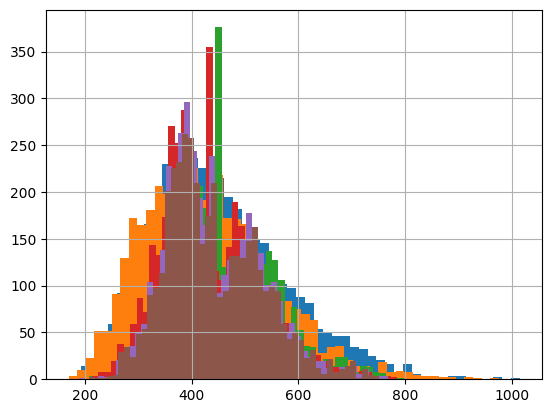

In [ ]:
df['home_passes'].hist(bins=50)
df['away_passes'].hist(bins=50)
df['passes_avg_H'].hist(bins=50)
df['passes_avg_A'].hist(bins=50)
df['passes_avg_home'].hist(bins=50)
df['passes_avg_away'].hist(bins=50)

<Axes: >

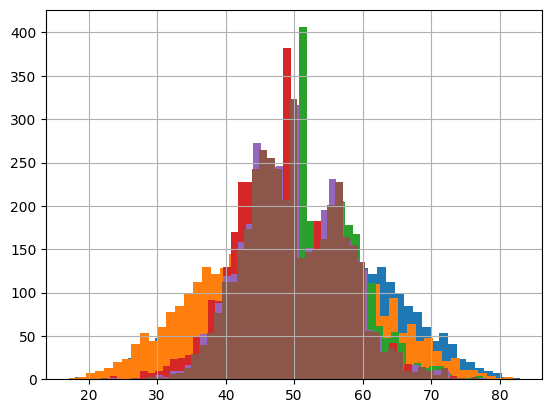

In [ ]:
df['home_possession'].hist(bins=50)
df['away_possession'].hist(bins=50)
df['possession_avg_H'].hist(bins=50)
df['possession_avg_A'].hist(bins=50)
df['possession_avg_home'].hist(bins=50)
df['possession_avg_away'].hist(bins=50)

<Axes: >

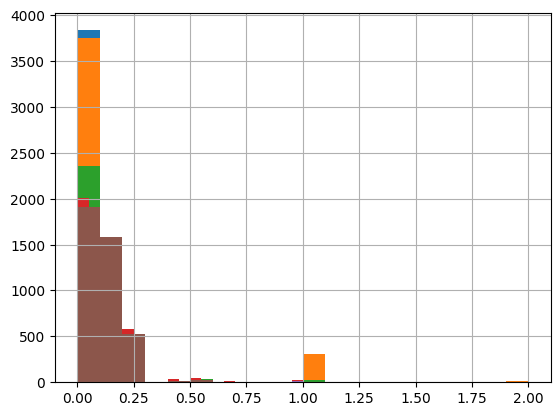

In [ ]:
df['home_red_cards'].hist(bins=20)
df['away_red_cards'].hist(bins=20)
df['red_cards_avg_H'].hist(bins=20)
df['red_cards_avg_A'].hist(bins=20)
df['red_cards_avg_home'].hist(bins=20)
df['red_cards_avg_away'].hist(bins=20)

<Axes: >

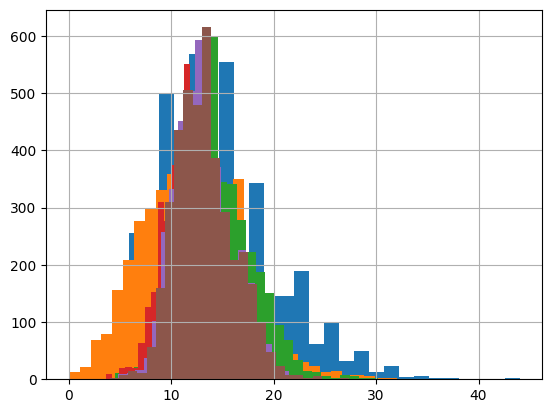

In [ ]:
df['home_shots'].hist(bins=30)
df['away_shots'].hist(bins=30)
df['shots_avg_H'].hist(bins=30)
df['shots_avg_A'].hist(bins=30)
df['shots_avg_home'].hist(bins=30)
df['shots_avg_away'].hist(bins=30)

<Axes: >

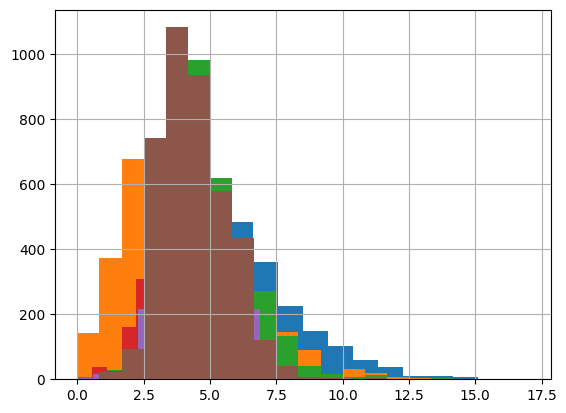

In [ ]:
df['home_shots_on_target'].hist(bins=18)
df['away_shots_on_target'].hist(bins=18)
df['shots_on_target_avg_H'].hist(bins=18)
df['shots_on_target_avg_A'].hist(bins=18)
df['shots_on_target_avg_home'].hist(bins=18)
df['shots_on_target_avg_away'].hist(bins=18)

<Axes: >

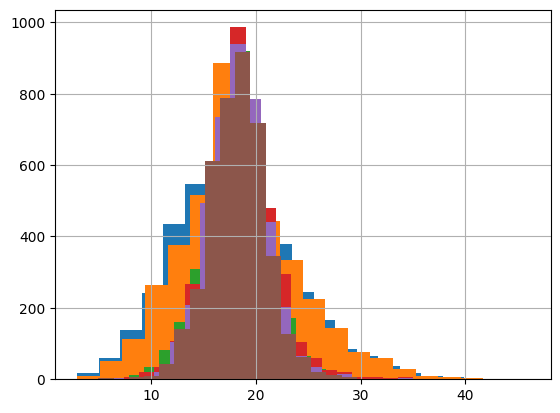

In [ ]:
df['home_tackles'].hist(bins=20)
df['away_tackles'].hist(bins=20)
df['tackles_avg_H'].hist(bins=20)
df['tackles_avg_A'].hist(bins=20)
df['tackles_avg_home'].hist(bins=20)
df['tackles_avg_away'].hist(bins=20)

<Axes: >

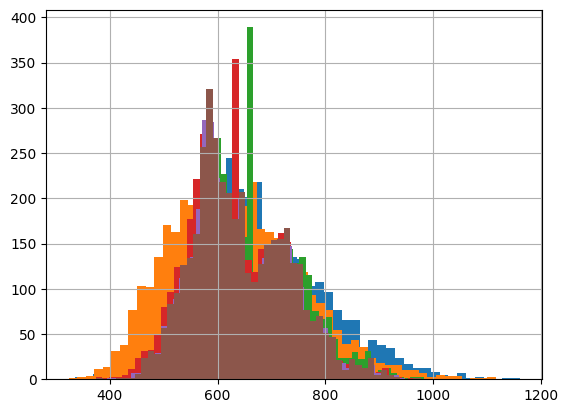

In [ ]:
df['home_touches'].hist(bins=50)
df['away_touches'].hist(bins=50)
df['touches_avg_H'].hist(bins=50)
df['touches_avg_A'].hist(bins=50)
df['touches_avg_home'].hist(bins=50)
df['touches_avg_away'].hist(bins=50)

<Axes: >

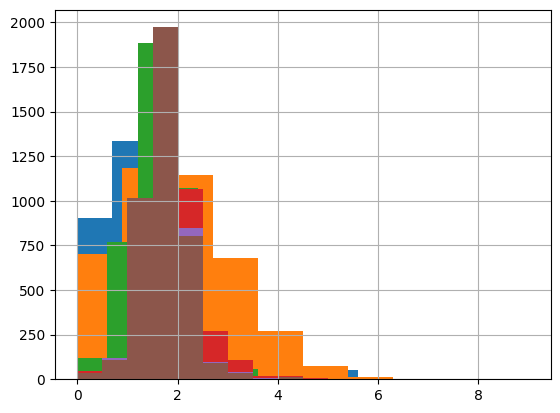

In [ ]:
df['home_yellow_cards'].hist(bins=10)
df['away_yellow_cards'].hist(bins=10)
df['yellow_cards_avg_H'].hist(bins=10)
df['yellow_cards_avg_A'].hist(bins=10)
df['yellow_cards_avg_home'].hist(bins=10)
df['yellow_cards_avg_away'].hist(bins=10)

<Axes: >

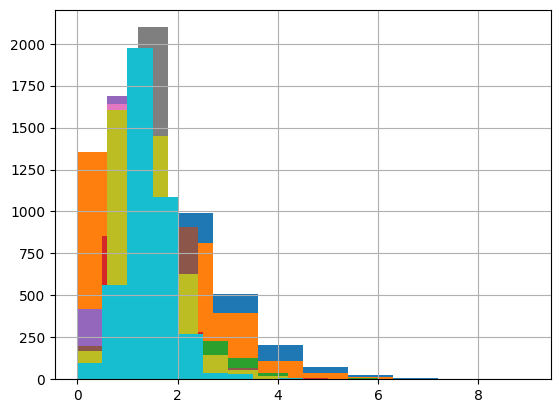

In [ ]:
df['goal_home_ft'].hist(bins=10)
df['goal_away_ft'].hist(bins=10)
df['goals_scored_ft_avg_H'].hist(bins=10)
df['goals_conced_ft_avg_H'].hist(bins=10)
df['goals_scored_ft_avg_A'].hist(bins=10)
df['goals_conced_ft_avg_A'].hist(bins=10)
df['goals_scored_ft_avg_home'].hist(bins=10)
df['goals_conced_ft_avg_home'].hist(bins=10)
df['goals_scored_ft_avg_away'].hist(bins=10)
df['goals_conced_ft_avg_away'].hist(bins=10)

<Axes: >

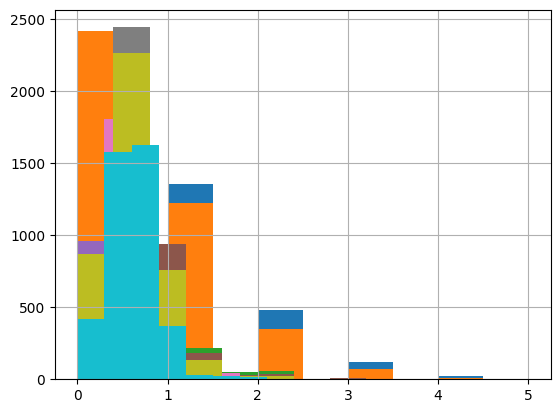

In [ ]:
df['goal_home_ht'].hist(bins=10)
df['goal_away_ht'].hist(bins=10)
df['goals_scored_ht_avg_H'].hist(bins=10)
df['goals_conced_ht_avg_H'].hist(bins=10)
df['goals_scored_ht_avg_A'].hist(bins=10)
df['goals_conced_ht_avg_A'].hist(bins=10)
df['goals_scored_ht_avg_home'].hist(bins=10)
df['goals_conced_ht_avg_home'].hist(bins=10)
df['goals_scored_ht_avg_away'].hist(bins=10)
df['goals_conced_ht_avg_away'].hist(bins=10)

<Axes: >

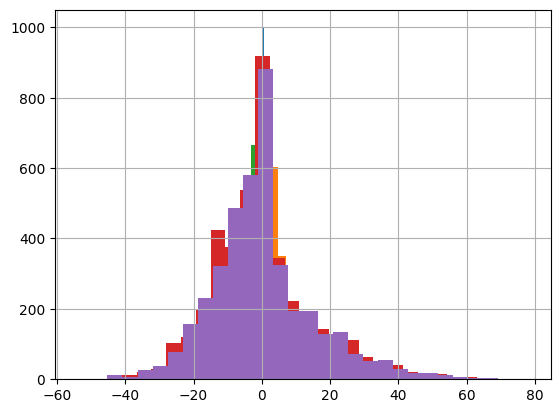

In [ ]:
df['sg_match_ft'].hist(bins=30)
df['sg_match_ft_acum_H'].hist(bins=30)
df['sg_match_ft_acum_A'].hist(bins=30)
df['sg_match_ft_acum_home'].hist(bins=30)
df['sg_match_ft_acum_away'].hist(bins=30)

<Axes: >

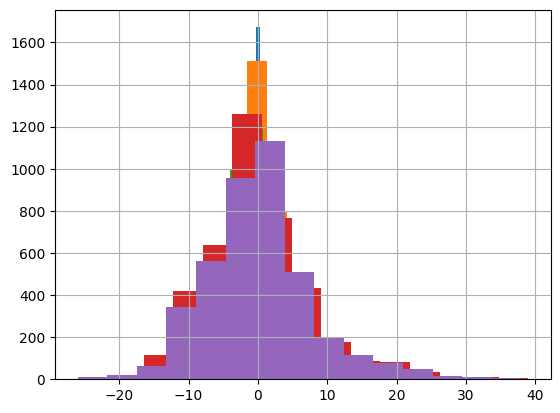

In [ ]:
df['sg_match_ht'].hist(bins=15)
df['sg_match_ht_acum_H'].hist(bins=15)
df['sg_match_ht_acum_A'].hist(bins=15)
df['sg_match_ht_acum_home'].hist(bins=15)
df['sg_match_ht_acum_away'].hist(bins=15)

<Axes: >

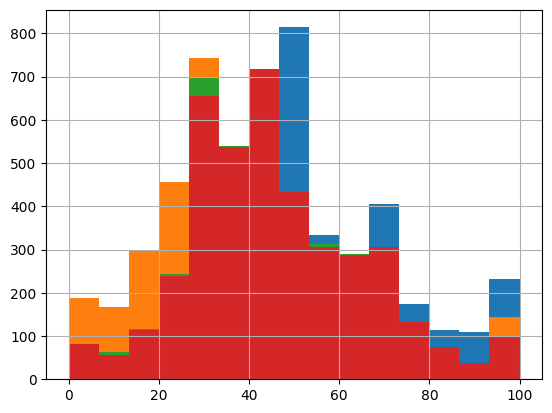

In [ ]:
df['performance_acum_H'].hist(bins=15)
df['performance_acum_A'].hist(bins=15)
df['performance_acum_home'].hist(bins=15)
df['performance_acum_away'].hist(bins=15)

--Tratamiento de datos innecesarios--

Datos inconsistentes

Capitalización:

In [ ]:
df['home_team'].value_counts(dropna=False)
df['away_team'].value_counts(dropna=False)

Manchester United           205
Arsenal                     204
Chelsea                     204
Manchester City             203
Everton                     203
Liverpool                   203
Tottenham Hotspur           202
Newcastle United            185
West Ham United             184
Southampton                 166
West Bromwich Albion        165
Stoke City                  152
Aston Villa                 147
Crystal Palace              146
Sunderland                  133
Swansea City                133
Leicester City              129
Fulham                      109
Burnley                     108
Norwich City                 95
Watford                      95
AFC Bournemouth              94
Wolverhampton Wanderers      91
Brighton and Hove Albion     70
Queens Park Rangers          57
Hull City                    57
Wigan Athletic               57
Huddersfield Town            38
Bolton Wanderers             38
Cardiff City                 38
Blackburn Rovers             38
Sheffiel

In [ ]:
df['home_team'] = df['home_team'].str.lower()
df['home_team'].value_counts(dropna=False)

manchester city             205
liverpool                   204
manchester united           203
chelsea                     203
arsenal                     203
everton                     203
tottenham hotspur           203
newcastle united            184
west ham united             184
west bromwich albion        167
southampton                 165
stoke city                  152
crystal palace              146
aston villa                 145
swansea city                133
sunderland                  133
leicester city              127
burnley                     110
fulham                      109
norwich city                 95
watford                      95
afc bournemouth              95
wolverhampton wanderers      89
brighton and hove albion     71
queens park rangers          57
wigan athletic               57
hull city                    57
huddersfield town            38
cardiff city                 38
bolton wanderers             38
blackburn rovers             38
sheffiel

In [ ]:
df['away_team'] = df['away_team'].str.lower()
df['away_team'].value_counts(dropna=False)

manchester united           205
arsenal                     204
chelsea                     204
manchester city             203
everton                     203
liverpool                   203
tottenham hotspur           202
newcastle united            185
west ham united             184
southampton                 166
west bromwich albion        165
stoke city                  152
aston villa                 147
crystal palace              146
sunderland                  133
swansea city                133
leicester city              129
fulham                      109
burnley                     108
norwich city                 95
watford                      95
afc bournemouth              94
wolverhampton wanderers      91
brighton and hove albion     70
queens park rangers          57
hull city                    57
wigan athletic               57
huddersfield town            38
bolton wanderers             38
cardiff city                 38
blackburn rovers             38
sheffiel

Duplicados:

In [ ]:
key = ['season', 'date', 'home_team', 'away_team', 'result_full']
df_dup = df.drop_duplicates(subset=key)

print("Registros originales:")
print(df.shape, "\n")
print("Registros sin duplicados:")
print(df_dup.shape, "\n")

Registros originales:
(4070, 114) 

Registros sin duplicados:
(4070, 114) 



Repetidos:

In [ ]:
#Con más del 90%
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

home_red_cards: 94.20147%
0.0    3834
1.0     229
2.0       7
Name: home_red_cards, dtype: int64

away_red_cards: 92.16216%
0.0    3751
1.0     305
2.0      14
Name: away_red_cards, dtype: int64



Eliminación de características:

In [ ]:
del(df['link_match'])
df

,Unnamed: 0,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,10/11,2010-11-01,blackpool,west bromwich albion,2-1,1-0,15.0,8.0,16.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,10/11,2011-04-11,liverpool,manchester city,3-0,3-0,16.0,6.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,10/11,2010-12-13,manchester united,arsenal,1-0,1-0,26.0,5.0,9.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,10/11,2010-09-13,stoke city,aston villa,2-1,0-1,26.0,8.0,12.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,10/11,2011-02-14,fulham,chelsea,0-0,0-0,50.0,4.0,11.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021-02-03,liverpool,brighton and hove albion,0-1,0-0,15.0,5.0,12.0,...,16.8,651.0,1.5,1.10,1.38,-6.0,0.52,0.67,-3.0,33.3
4066,4066,20/21,2021-03-03,burnley,leicester city,1-1,1-1,13.0,5.0,6.0,...,17.7,679.0,1.8,1.73,1.15,15.0,0.77,0.58,5.0,62.8
4067,4067,20/21,2021-03-03,crystal palace,manchester united,0-0,0-0,25.0,4.0,4.0,...,14.9,742.6,1.6,2.04,1.23,21.0,0.85,0.69,4.0,64.1
4068,4068,20/21,2021-03-03,sheffield united,aston villa,1-0,1-0,47.0,2.0,13.0,...,13.3,587.0,1.7,1.58,1.08,12.0,0.67,0.42,6.0,54.2


Conversión de fechas:

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y/%m/%d')
print(df['date'].value_counts(dropna=False),"\n")
df

2020/07/26    10
2015/05/24    10
2014/05/11    10
2013/12/26    10
2014/01/01    10
              ..
2015/12/30     1
2016/04/13     1
2015/12/29     1
2016/04/19     1
2020/12/30     1
Name: date, Length: 1125, dtype: int64 



,Unnamed: 0,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,15.0,8.0,16.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,16.0,6.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,26.0,5.0,9.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,26.0,8.0,12.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,50.0,4.0,11.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,15.0,5.0,12.0,...,16.8,651.0,1.5,1.10,1.38,-6.0,0.52,0.67,-3.0,33.3
4066,4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,13.0,5.0,6.0,...,17.7,679.0,1.8,1.73,1.15,15.0,0.77,0.58,5.0,62.8
4067,4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,25.0,4.0,4.0,...,14.9,742.6,1.6,2.04,1.23,21.0,0.85,0.69,4.0,64.1
4068,4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,47.0,2.0,13.0,...,13.3,587.0,1.7,1.58,1.08,12.0,0.67,0.42,6.0,54.2


Cambio de nombre a característica:

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'id'})
df

,id,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,15.0,8.0,16.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,16.0,6.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,26.0,5.0,9.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,26.0,8.0,12.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,50.0,4.0,11.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,15.0,5.0,12.0,...,16.8,651.0,1.5,1.10,1.38,-6.0,0.52,0.67,-3.0,33.3
4066,4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,13.0,5.0,6.0,...,17.7,679.0,1.8,1.73,1.15,15.0,0.77,0.58,5.0,62.8
4067,4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,25.0,4.0,4.0,...,14.9,742.6,1.6,2.04,1.23,21.0,0.85,0.69,4.0,64.1
4068,4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,47.0,2.0,13.0,...,13.3,587.0,1.7,1.58,1.08,12.0,0.67,0.42,6.0,54.2


Conversión de características en continuas:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
selected_features = ['home_clearances', 'home_corners', 'home_fouls_conceded', 'home_offsides', 'home_passes', 'home_possession', 'home_red_cards', 'home_shots', 'home_shots_on_target', 'home_tackles', 'home_touches',
                     'home_yellow_cards', 'away_clearances', 'away_corners', 'away_fouls_conceded', 'away_offsides', 'away_passes', 'away_possession', 'away_red_cards', 'away_shots', 'away_shots_on_target', 'away_tackles',
                     'away_touches', 'away_yellow_cards', 'goal_home_ft', 'goal_away_ft', 'sg_match_ft', 'goal_home_ht', 'goal_away_ht', 'sg_match_ht', 'clearances_avg_H', 'corners_avg_H', 'fouls_conceded_avg_H',
                     'offsides_avg_H', 'passes_avg_H', 'possession_avg_H', 'red_cards_avg_H', 'shots_avg_H', 'shots_on_target_avg_H', 'tackles_avg_H', 'touches_avg_H', 'yellow_cards_avg_H', 'goals_scored_ft_avg_H',
                     'goals_conced_ft_avg_H', 'sg_match_ft_acum_H', 'goals_scored_ht_avg_H', 'goals_conced_ht_avg_H', 'sg_match_ht_acum_H', 'performance_acum_H', 'clearances_avg_A', 'corners_avg_A', 'fouls_conceded_avg_A',
                     'offsides_avg_A', 'passes_avg_A', 'possession_avg_A', 'red_cards_avg_A', 'shots_avg_A', 'shots_on_target_avg_A', 'tackles_avg_A', 'touches_avg_A', 'yellow_cards_avg_A', 'goals_scored_ft_avg_A',
                     'goals_conced_ft_avg_A', 'sg_match_ft_acum_A', 'goals_scored_ht_avg_A', 'goals_conced_ht_avg_A', 'sg_match_ht_acum_A', 'performance_acum_A', 'clearances_avg_home', 'corners_avg_home', 'fouls_conceded_avg_home',
                     'offsides_avg_home', 'passes_avg_home', 'possession_avg_home', 'red_cards_avg_home', 'shots_avg_home', 'shots_on_target_avg_home', 'tackles_avg_home', 'touches_avg_home', 'yellow_cards_avg_home',
                     'goals_scored_ft_avg_home', 'goals_conced_ft_avg_home', 'sg_match_ft_acum_home','goals_scored_ht_avg_home', 'goals_conced_ht_avg_home', 'sg_match_ht_acum_home', 'performance_acum_home', 'clearances_avg_away',
                     'corners_avg_away', 'fouls_conceded_avg_away', 'offsides_avg_away', 'passes_avg_away', 'possession_avg_away', 'red_cards_avg_away', 'shots_avg_away', 'shots_on_target_avg_away', 'tackles_avg_away',
                     'touches_avg_away', 'yellow_cards_avg_away', 'goals_scored_ft_avg_away', 'goals_conced_ft_avg_away', 'sg_match_ft_acum_away', 'goals_scored_ht_avg_away', 'goals_conced_ht_avg_away', 'sg_match_ht_acum_away',
                     'performance_acum_away']
df[selected_features] = scaler.fit_transform(df[selected_features])
df[selected_features] = df[selected_features].round(2)
df[selected_features]

,home_clearances,home_corners,home_fouls_conceded,home_offsides,home_passes,home_possession,home_red_cards,home_shots,home_shots_on_target,home_tackles,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0.21,0.42,0.67,0.18,0.45,0.73,0.0,0.59,0.29,0.39,...,0.52,0.35,0.32,0.24,0.33,0.39,0.08,0.26,0.34,0.56
1,0.22,0.32,0.25,0.45,0.42,0.54,0.0,0.48,0.29,0.68,...,0.59,0.51,0.40,0.27,0.17,0.58,0.22,0.11,0.67,0.60
2,0.36,0.26,0.38,0.27,0.30,0.43,0.0,0.39,0.35,0.59,...,0.56,0.62,0.36,0.35,0.22,0.53,0.24,0.13,0.55,0.67
3,0.36,0.42,0.50,0.18,0.12,0.39,0.0,0.48,0.53,0.32,...,0.69,0.32,0.40,0.22,0.40,0.39,0.25,0.33,0.41,0.67
4,0.68,0.21,0.46,0.09,0.19,0.30,0.0,0.30,0.29,0.71,...,0.50,0.59,0.28,0.31,0.18,0.59,0.21,0.16,0.55,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,0.21,0.26,0.50,0.00,0.62,0.70,0.0,0.25,0.06,0.22,...,0.41,0.46,0.30,0.18,0.28,0.36,0.13,0.22,0.36,0.33
4066,0.18,0.26,0.25,0.27,0.21,0.32,0.0,0.27,0.41,0.12,...,0.44,0.51,0.36,0.29,0.23,0.52,0.19,0.19,0.48,0.63
4067,0.34,0.21,0.17,0.09,0.21,0.29,0.0,0.18,0.12,0.39,...,0.34,0.61,0.32,0.34,0.25,0.57,0.21,0.23,0.47,0.64
4068,0.64,0.11,0.54,0.09,0.10,0.16,0.5,0.20,0.12,0.24,...,0.29,0.35,0.34,0.26,0.22,0.50,0.17,0.14,0.50,0.54


In [ ]:
df

,id,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,0.21,0.42,0.67,...,0.52,0.35,0.32,0.24,0.33,0.39,0.08,0.26,0.34,0.56
1,1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,0.22,0.32,0.25,...,0.59,0.51,0.40,0.27,0.17,0.58,0.22,0.11,0.67,0.60
2,2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,0.36,0.26,0.38,...,0.56,0.62,0.36,0.35,0.22,0.53,0.24,0.13,0.55,0.67
3,3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,0.36,0.42,0.50,...,0.69,0.32,0.40,0.22,0.40,0.39,0.25,0.33,0.41,0.67
4,4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,0.68,0.21,0.46,...,0.50,0.59,0.28,0.31,0.18,0.59,0.21,0.16,0.55,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,0.21,0.26,0.50,...,0.41,0.46,0.30,0.18,0.28,0.36,0.13,0.22,0.36,0.33
4066,4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,0.18,0.26,0.25,...,0.44,0.51,0.36,0.29,0.23,0.52,0.19,0.19,0.48,0.63
4067,4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,0.34,0.21,0.17,...,0.34,0.61,0.32,0.34,0.25,0.57,0.21,0.23,0.47,0.64
4068,4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,0.64,0.11,0.54,...,0.29,0.35,0.34,0.26,0.22,0.50,0.17,0.14,0.50,0.54


Creación de las características numéricas result_match y result_descanso a partir del resultado final y del resultado al descanso de los partidos:

In [ ]:
def determinar_resultado_final(result):
    golesLocal, golesVisitante = result.split('-')
    golesLocal = int(golesLocal)
    golesVisitante = int(golesVisitante)

    if golesLocal > golesVisitante:
        return '0'
    elif golesLocal < golesVisitante:
        return '2'
    else:
        return '1'

df['result_match'] = df['result_full'].apply(determinar_resultado_final)

0: Gana el equipo local,
1: Empate,
2: Gana el equipo visitante.

In [ ]:
def determinar_resultado_descanso(result):
    golesLocalDescanso, golesVisitanteDescanso = result.split('-')
    golesLocalDescanso = int(golesLocalDescanso)
    golesVisitanteDescanso = int(golesVisitanteDescanso)

    if golesLocalDescanso > golesVisitanteDescanso:
        return '0'
    elif golesLocalDescanso < golesVisitanteDescanso:
        return '2'
    else:
        return '1'

df['result_descanso'] = df['result_ht'].apply(determinar_resultado_descanso)
df

,id,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,result_match,result_descanso
0,0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,0.21,0.42,0.67,...,0.32,0.24,0.33,0.39,0.08,0.26,0.34,0.56,0,0
1,1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,0.22,0.32,0.25,...,0.40,0.27,0.17,0.58,0.22,0.11,0.67,0.60,0,0
2,2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,0.36,0.26,0.38,...,0.36,0.35,0.22,0.53,0.24,0.13,0.55,0.67,0,0
3,3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,0.36,0.42,0.50,...,0.40,0.22,0.40,0.39,0.25,0.33,0.41,0.67,0,2
4,4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,0.68,0.21,0.46,...,0.28,0.31,0.18,0.59,0.21,0.16,0.55,0.59,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,0.21,0.26,0.50,...,0.30,0.18,0.28,0.36,0.13,0.22,0.36,0.33,2,1
4066,4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,0.18,0.26,0.25,...,0.36,0.29,0.23,0.52,0.19,0.19,0.48,0.63,1,1
4067,4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,0.34,0.21,0.17,...,0.32,0.34,0.25,0.57,0.21,0.23,0.47,0.64,1,1
4068,4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,0.64,0.11,0.54,...,0.34,0.26,0.22,0.50,0.17,0.14,0.50,0.54,0,0


Guardado del dataset limpio y escalado:

In [ ]:
csv_name = "datasetEscalado.csv"
df.to_csv(csv_name, index=False)

print(f"El archivo '{csv_name}' ha sido guardado con éxito.")

El archivo 'datasetEscalado.csv' ha sido guardado con éxito.


Eliminación de columnas innecesarias referentes a promedios que no aportan al análisis:

In [ ]:
eliminar_columnas = ['clearances_avg_home', 'corners_avg_home','fouls_conceded_avg_home', 'offsides_avg_home','passes_avg_home', 'possession_avg_home','red_cards_avg_home', 'shots_avg_home',
                     'shots_on_target_avg_home', 'tackles_avg_home','touches_avg_home', 'yellow_cards_avg_home','goals_scored_ft_avg_home','goals_conced_ft_avg_home', 'sg_match_ft_acum_home',
                     'goals_scored_ht_avg_home', 'goals_conced_ht_avg_home', 'sg_match_ht_acum_home', 'performance_acum_home','clearances_avg_away', 'corners_avg_away','fouls_conceded_avg_away',
                     'offsides_avg_away', 'passes_avg_away', 'possession_avg_away', 'red_cards_avg_away', 'shots_avg_away','shots_on_target_avg_away', 'tackles_avg_away','touches_avg_away',
                     'yellow_cards_avg_away', 'goals_scored_ft_avg_away', 'goals_conced_ft_avg_away', 'sg_match_ft_acum_away', 'goals_scored_ht_avg_away', 'goals_conced_ht_avg_away',
                     'sg_match_ht_acum_away', 'performance_acum_away']
df = df.drop(eliminar_columnas, axis=1)

Guardado del dataset con las columnas que van a servir para llevar a cabo el análisis:

In [ ]:
csv_name = "datasetSeleccionadas.csv"
df.to_csv(csv_name, index=False)

print(f"El archivo '{csv_name}' ha sido guardado con éxito.")

El archivo 'datasetSeleccionadas.csv' ha sido guardado con éxito.


In [ ]:
df

,id,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,yellow_cards_avg_A,goals_scored_ft_avg_A,goals_conced_ft_avg_A,sg_match_ft_acum_A,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso
0,0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,0.21,0.42,0.67,...,0.24,0.21,0.46,0.42,0.00,0.25,0.40,0.33,0,0
1,1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,0.22,0.32,0.25,...,0.50,0.24,0.18,0.61,0.27,0.07,0.74,0.49,0,0
2,2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,0.36,0.26,0.38,...,0.32,0.31,0.17,0.62,0.29,0.06,0.66,0.71,0,0
3,3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,0.36,0.42,0.50,...,0.20,0.00,1.00,0.42,0.00,0.75,0.43,0.00,0,2
4,4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,0.68,0.21,0.46,...,0.36,0.28,0.18,0.64,0.23,0.19,0.49,0.46,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,0.21,0.26,0.50,...,0.18,0.20,0.23,0.48,0.20,0.20,0.46,0.40,2,1
4066,4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,0.18,0.26,0.25,...,0.40,0.32,0.14,0.73,0.23,0.10,0.63,0.77,1,1
4067,4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,0.34,0.21,0.17,...,0.26,0.32,0.17,0.70,0.23,0.19,0.49,0.74,1,1
4068,4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,0.64,0.11,0.54,...,0.34,0.23,0.13,0.64,0.21,0.06,0.66,0.59,0,0


Matriz de correlaciones inicial:

In [ ]:
matriz_de_correlacion = df.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
corr_pairs = matriz_de_correlacion.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.7) & (abs(sorted_pairs) < 1)]

print(strong_pairs)

away_touches     home_possession   -0.898759
home_possession  away_touches      -0.898759
away_possession  home_touches      -0.895237
home_touches     away_possession   -0.895237
home_possession  away_passes       -0.879879
                                      ...   
home_touches     home_passes        0.982394
passes_avg_H     touches_avg_H      0.988481
touches_avg_H    passes_avg_H       0.988481
touches_avg_A    passes_avg_A       0.989548
passes_avg_A     touches_avg_A      0.989548
Length: 66, dtype: float64


Gráficos referentes a posibles preguntas de interés iniciales para un análisis previo a la minería de datos:

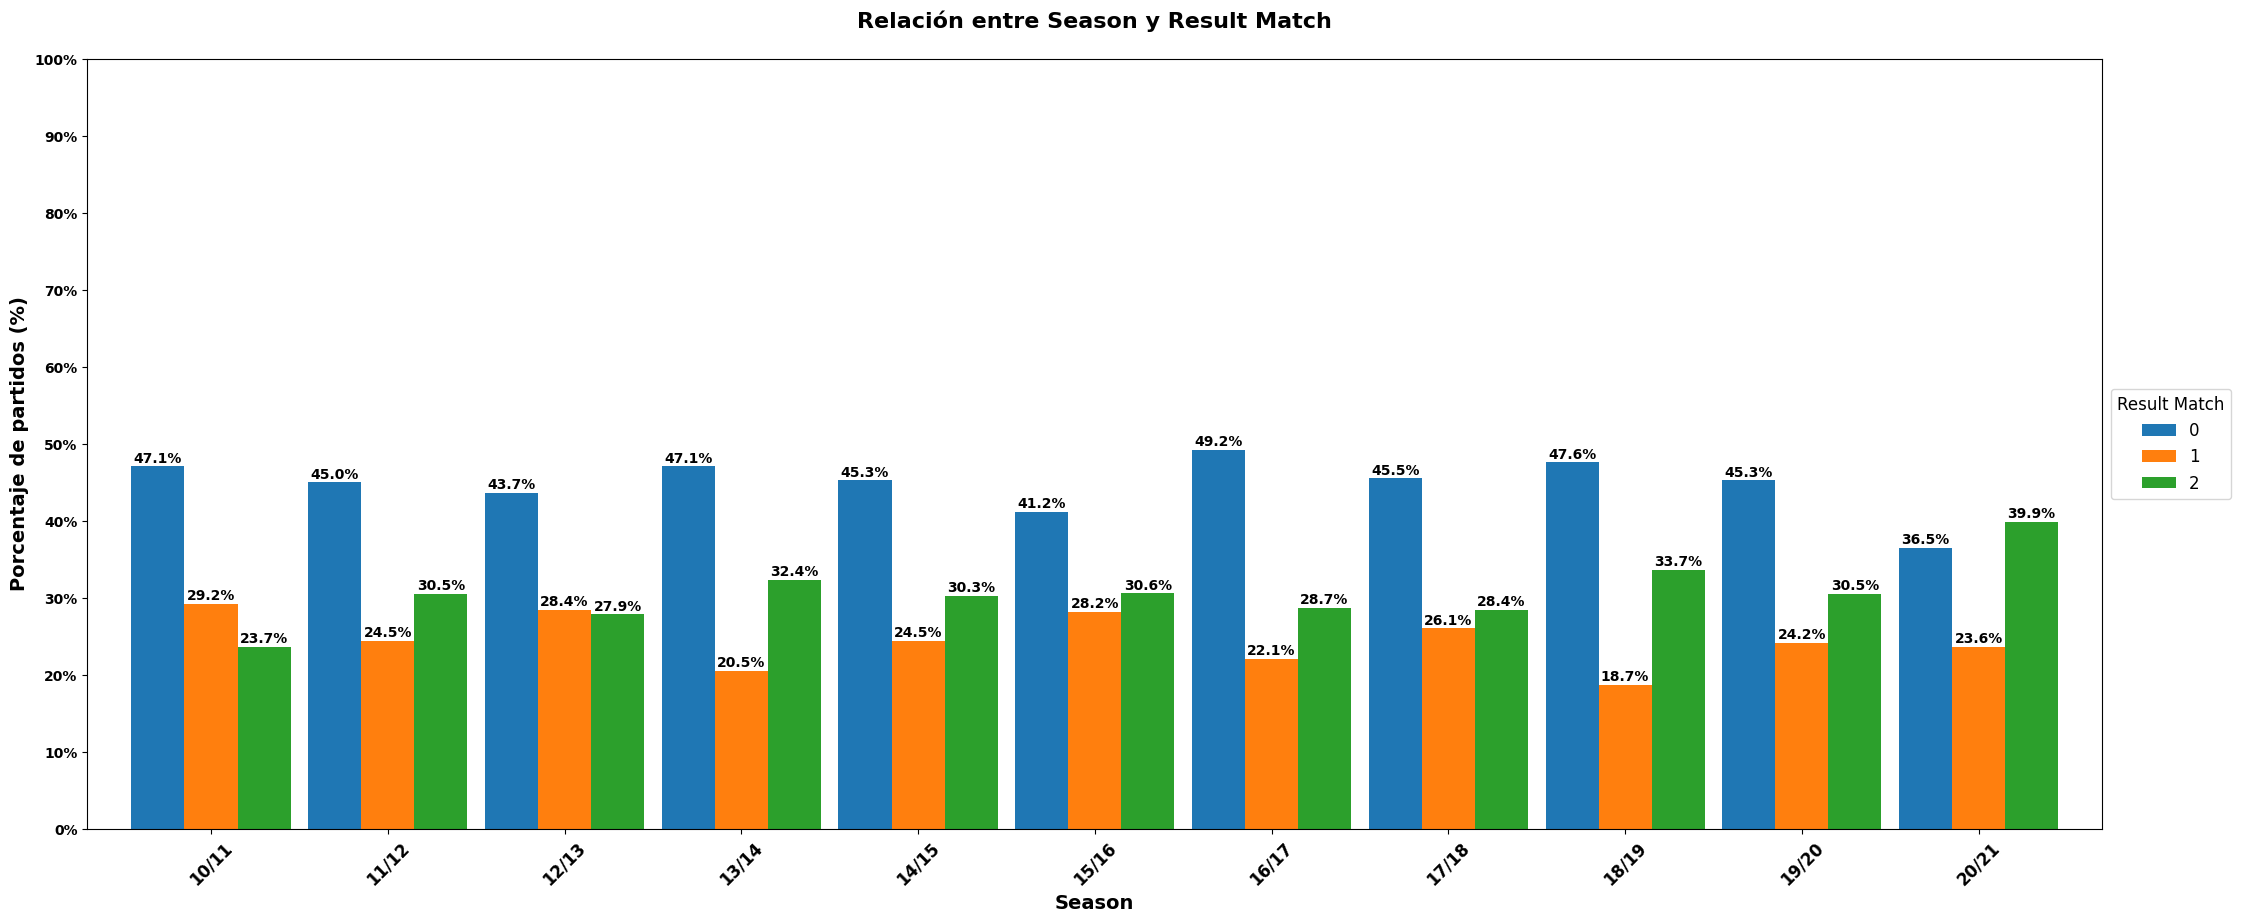

In [ ]:
from matplotlib.ticker import FuncFormatter

custom_order = ['0', '1', '2']

df['result_match'] = pd.Categorical(df['result_match'], categories=custom_order, ordered=True)
result_season_counts = df.groupby(['season', 'result_match']).size().unstack()
result_season_percentages = result_season_counts.div(result_season_counts.sum(axis=1), axis=0) * 100
ax = result_season_percentages.plot(kind='bar', figsize=(26, 10), width=0.9)

title = 'Relación entre Season y Result Match\n'
plt.title(title, fontsize=16, weight='bold')
plt.xlabel('Season', fontsize=14, weight='bold')
plt.ylabel('Porcentaje de partidos (%)', fontsize=14, weight='bold')
plt.xticks(rotation=45, fontsize=12, weight='bold')
plt.yticks(range(0, 101, 10), [f'{i}%' for i in range(0, 101, 10)], fontsize=10, weight='bold')

def annotate_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                    ha='center', va='center', fontsize=10, weight='bold')

annotate_bars(ax)


ax.legend(title='Result Match', fontsize=12, title_fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

<ipython-input-49-4fc4128b27d2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_goals = df.groupby('season')['goal_home_ht', 'goal_away_ht'].mean()


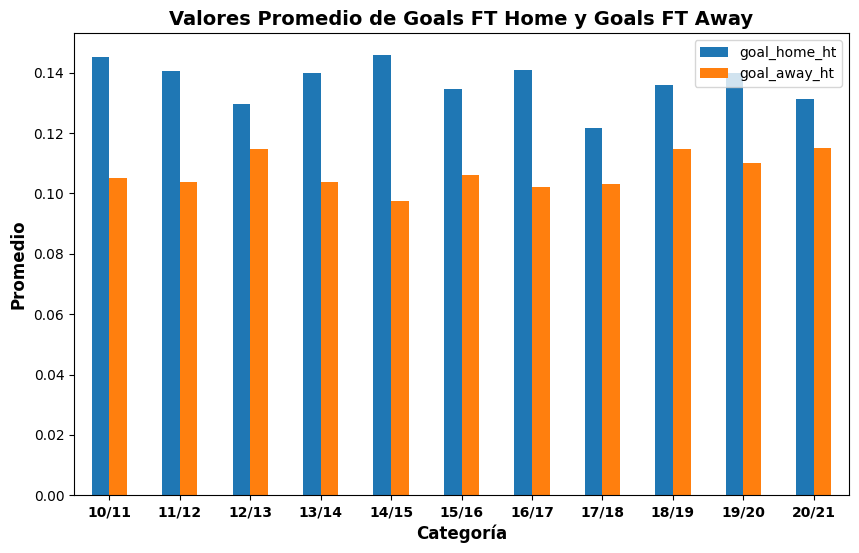

In [ ]:
average_goals = df.groupby('season')['goal_home_ht', 'goal_away_ht'].mean()

average_goals.plot(kind='bar', figsize=(10, 6))

plt.title('Valores Promedio de Goals FT Home y Goals FT Away', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12, fontweight='bold')
plt.ylabel('Promedio', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

plt.show()

<ipython-input-50-e12a9dfdb9fc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_goals = df.groupby('season')['home_red_cards', 'away_red_cards'].mean()


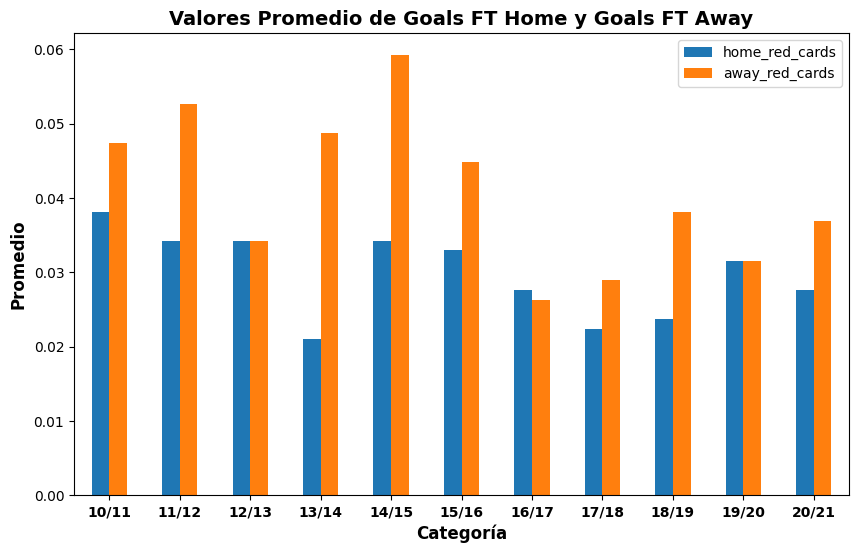

In [ ]:
average_goals = df.groupby('season')['home_red_cards', 'away_red_cards'].mean()
average_goals.plot(kind='bar', figsize=(10, 6))

plt.title('Valores Promedio de Goals FT Home y Goals FT Away', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12, fontweight='bold')
plt.ylabel('Promedio', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

plt.show()

<ipython-input-51-1c8173651bdf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_goals = df.groupby('season')['goals_scored_ft_avg_A', 'goals_conced_ft_avg_A'].mean()


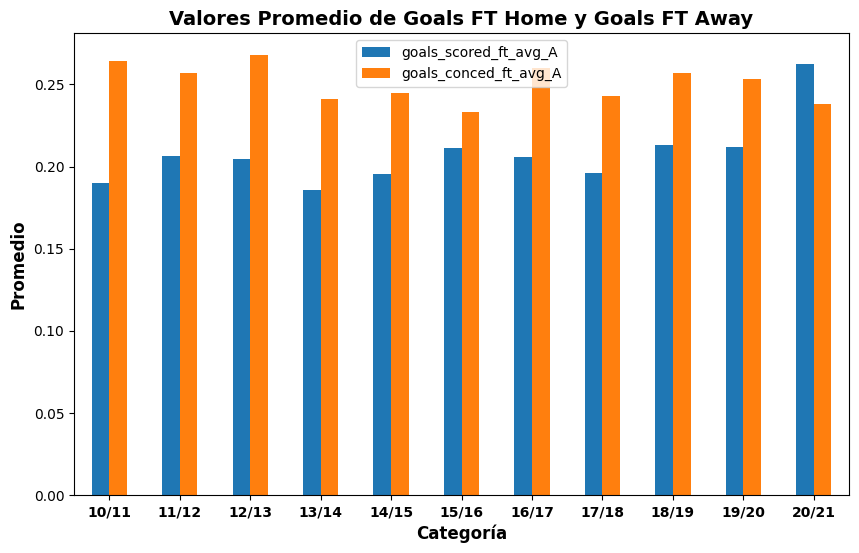

In [ ]:
average_goals = df.groupby('season')['goals_scored_ft_avg_A', 'goals_conced_ft_avg_A'].mean()
average_goals.plot(kind='bar', figsize=(10, 6))

plt.title('Valores Promedio de Goals FT Home y Goals FT Away', fontsize=14, fontweight='bold')
plt.xlabel('Categoría', fontsize=12, fontweight='bold')
plt.ylabel('Promedio', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


result_match            0    1    2
cluster_yellow_cards               
0                     548  242  341
1                     134  111  122
2                     340  136  150
3                     182  142  179
4                     296  184  197
5                     335  185  246


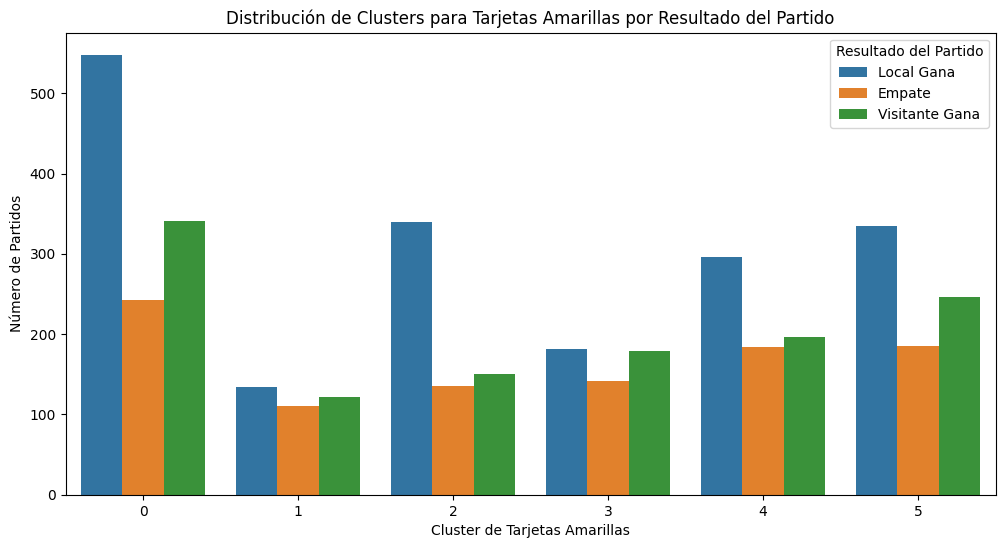

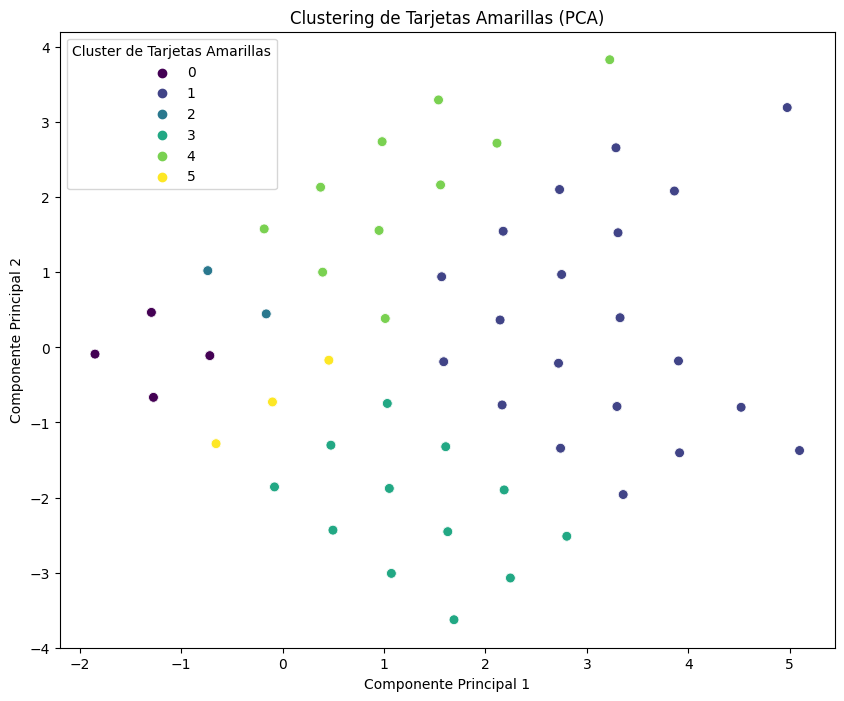

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd


features_yellow_cards = ['home_yellow_cards', 'away_yellow_cards']

features_for_clustering_yellow_cards = df[features_yellow_cards]

# Normalización
scaler_yellow_cards = StandardScaler()
features_scaled_yellow_cards = scaler_yellow_cards.fit_transform(features_for_clustering_yellow_cards)

kmeans_yellow_cards = KMeans(n_clusters=6, random_state=42)
df['cluster_yellow_cards'] = kmeans_yellow_cards.fit_predict(features_scaled_yellow_cards)

result_distribution_yellow_cards = df.groupby(['cluster_yellow_cards', 'result_match']).size().unstack(fill_value=0)
print(result_distribution_yellow_cards)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_yellow_cards', hue='result_match', data=df)
plt.title('Distribución de Clusters para Tarjetas Amarillas por Resultado del Partido')
plt.xlabel('Cluster de Tarjetas Amarillas')
plt.ylabel('Número de Partidos')
plt.legend(title='Resultado del Partido', loc='upper right', labels=['Local Gana', 'Empate', 'Visitante Gana'])
plt.show()

from sklearn.decomposition import PCA

# Aplicar PCA
pca_yellow_cards = PCA(n_components=2)
features_pca_yellow_cards = pca_yellow_cards.fit_transform(features_scaled_yellow_cards)

df['PCA_Component_Yellow_Cards_1'] = features_pca_yellow_cards[:, 0]
df['PCA_Component_Yellow_Cards_2'] = features_pca_yellow_cards[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA_Component_Yellow_Cards_1', y='PCA_Component_Yellow_Cards_2', hue='cluster_yellow_cards', data=df, palette='viridis', s=50)
plt.title('Clustering de Tarjetas Amarillas (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster de Tarjetas Amarillas')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_red_cards
0    3540
1     236
2     294
dtype: int64


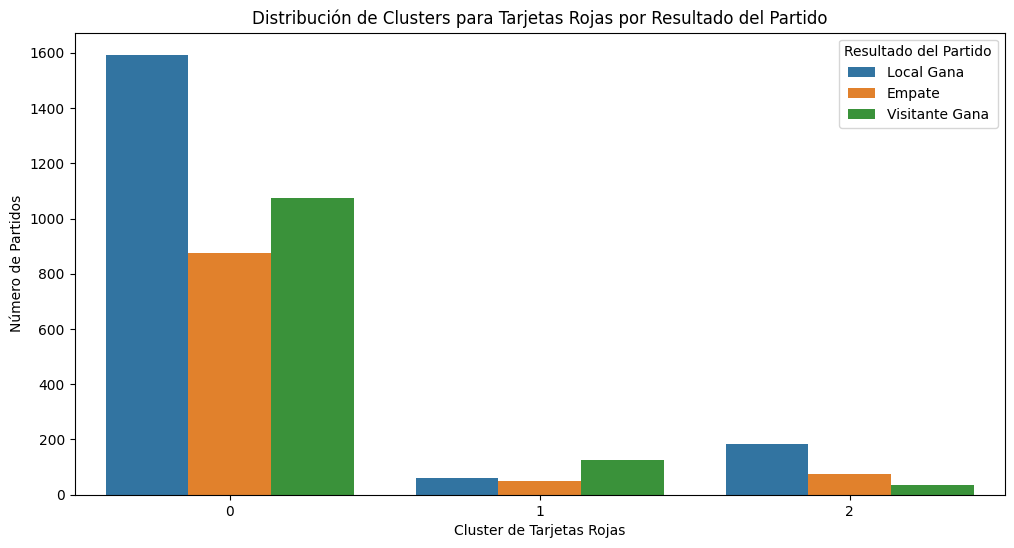

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

features_red_cards = ['home_red_cards', 'away_red_cards']
features_for_clustering_red_cards = df[features_red_cards]

scaler_red_cards = StandardScaler()
features_scaled_red_cards = scaler_red_cards.fit_transform(features_for_clustering_red_cards)

kmeans_red_cards = KMeans(n_clusters=3, random_state=42)
df['cluster_red_cards'] = kmeans_red_cards.fit_predict(features_scaled_red_cards)

cluster_distribution_red_cards = df.groupby('cluster_red_cards').size()
print(cluster_distribution_red_cards)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='cluster_red_cards', hue='result_match', data=df)
plt.title('Distribución de Clusters para Tarjetas Rojas por Resultado del Partido')
plt.xlabel('Cluster de Tarjetas Rojas')
plt.ylabel('Número de Partidos')
plt.legend(title='Resultado del Partido', loc='upper right', labels=['Local Gana', 'Empate', 'Visitante Gana'])
plt.show()


In [ ]:
csv_name = "datasetSeleccionadasPreClustering.csv"
df.to_csv(csv_name, index=False)

print(f"El archivo '{csv_name}' ha sido guardado con éxito.")

El archivo 'datasetSeleccionadasPreClustering.csv' ha sido guardado con éxito.


Eliminación de columnas menores del 60% de correlación:

In [ ]:
eliminacion_clumnas_menor_60 = ['id', 'home_clearances', 'home_fouls_conceded', 'home_offsides',  'home_red_cards', 'home_tackles', 'home_yellow_cards', 'away_clearances', 'away_fouls_conceded',
                                'away_offsides', 'away_red_cards', 'away_tackles', 'away_yellow_cards', 'clearances_avg_H', 'fouls_conceded_avg_H', 'offsides_avg_H', 'red_cards_avg_H', 'tackles_avg_H',
                                'yellow_cards_avg_H', 'fouls_conceded_avg_A', 'offsides_avg_A', 'red_cards_avg_A', 'tackles_avg_A', 'yellow_cards_avg_A', 'home_corners', 'away_corners']
df.drop(eliminacion_clumnas_menor_60, axis=1, inplace=True)

In [ ]:
df

,season,date,home_team,away_team,result_full,result_ht,home_passes,home_possession,home_shots,home_shots_on_target,...,goals_scored_ht_avg_A,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso,cluster_yellow_cards,PCA_Component_Yellow_Cards_1,PCA_Component_Yellow_Cards_2,cluster_red_cards
0,10/11,2010/11/01,blackpool,west bromwich albion,2-1,1-0,0.45,0.73,0.59,0.29,...,0.00,0.25,0.40,0.33,0,0,4,1.012716,0.385653,2
1,10/11,2011/04/11,liverpool,manchester city,3-0,3-0,0.42,0.54,0.48,0.29,...,0.27,0.07,0.74,0.49,0,0,0,-1.272415,-0.665006,0
2,10/11,2010/12/13,manchester united,arsenal,1-0,1-0,0.30,0.43,0.39,0.35,...,0.29,0.06,0.66,0.71,0,0,4,0.375358,2.134941,0
3,10/11,2010/09/13,stoke city,aston villa,2-1,0-1,0.12,0.39,0.48,0.53,...,0.00,0.75,0.43,0.00,0,2,2,-0.160485,0.446924,0
4,10/11,2011/02/14,fulham,chelsea,0-0,0-0,0.19,0.30,0.30,0.29,...,0.23,0.19,0.49,0.46,1,1,5,-0.099214,-0.726277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,20/21,2021/02/03,liverpool,brighton and hove albion,0-1,0-0,0.62,0.70,0.25,0.06,...,0.20,0.20,0.46,0.40,2,1,0,-1.272415,-0.665006,0
4066,20/21,2021/03/03,burnley,leicester city,1-1,1-1,0.21,0.32,0.27,0.41,...,0.23,0.10,0.63,0.77,1,1,2,-0.736572,1.023011,0
4067,20/21,2021/03/03,crystal palace,manchester united,0-0,0-0,0.21,0.29,0.18,0.12,...,0.23,0.19,0.49,0.74,1,1,0,-1.272415,-0.665006,0
4068,20/21,2021/03/03,sheffield united,aston villa,1-0,1-0,0.10,0.16,0.20,0.12,...,0.21,0.06,0.66,0.59,0,0,0,-1.272415,-0.665006,1


Conversión de la columna season y eliminación de la columna fecha:

In [ ]:
df.drop('date', axis=1, inplace=True)

conversion_season = {'10/11': 1, '11/12': 2, '12/13': 3, '13/14': 4, '14/15': 5, '15/16': 6, '16/17': 7, '17/18': 8, '18/19': 9, '19/20': 10, '20/21': 11}
df['num_season'] = df['season'].map(conversion_season)
df.drop('season', axis=1, inplace=True)

In [ ]:
df

,home_team,away_team,result_full,result_ht,home_passes,home_possession,home_shots,home_shots_on_target,home_touches,away_passes,...,goals_conced_ht_avg_A,sg_match_ht_acum_A,performance_acum_A,result_match,result_descanso,cluster_yellow_cards,PCA_Component_Yellow_Cards_1,PCA_Component_Yellow_Cards_2,cluster_red_cards,num_season
0,blackpool,west bromwich albion,2-1,1-0,0.45,0.73,0.59,0.29,0.49,0.14,...,0.25,0.40,0.33,0,0,4,1.012716,0.385653,2,1
1,liverpool,manchester city,3-0,3-0,0.42,0.54,0.48,0.29,0.50,0.37,...,0.07,0.74,0.49,0,0,0,-1.272415,-0.665006,0,1
2,manchester united,arsenal,1-0,1-0,0.30,0.43,0.39,0.35,0.36,0.41,...,0.06,0.66,0.71,0,0,4,0.375358,2.134941,0,1
3,stoke city,aston villa,2-1,0-1,0.12,0.39,0.48,0.53,0.19,0.26,...,0.75,0.43,0.00,0,2,2,-0.160485,0.446924,0,1
4,fulham,chelsea,0-0,0-0,0.19,0.30,0.30,0.29,0.29,0.51,...,0.19,0.49,0.46,1,1,5,-0.099214,-0.726277,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,liverpool,brighton and hove albion,0-1,0-0,0.62,0.70,0.25,0.06,0.67,0.29,...,0.20,0.46,0.40,2,1,0,-1.272415,-0.665006,0,11
4066,burnley,leicester city,1-1,1-1,0.21,0.32,0.27,0.41,0.23,0.50,...,0.10,0.63,0.77,1,1,2,-0.736572,1.023011,0,11
4067,crystal palace,manchester united,0-0,0-0,0.21,0.29,0.18,0.12,0.25,0.53,...,0.19,0.49,0.74,1,1,0,-1.272415,-0.665006,0,11
4068,sheffield united,aston villa,1-0,1-0,0.10,0.16,0.20,0.12,0.13,0.58,...,0.06,0.66,0.59,0,0,0,-1.272415,-0.665006,1,11


Segunda matriz de correlaciones con únicamente características correlacionadas en un 60% o más:

<ipython-input-59-791b8ce1fc04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_de_correlacion = df.corr()


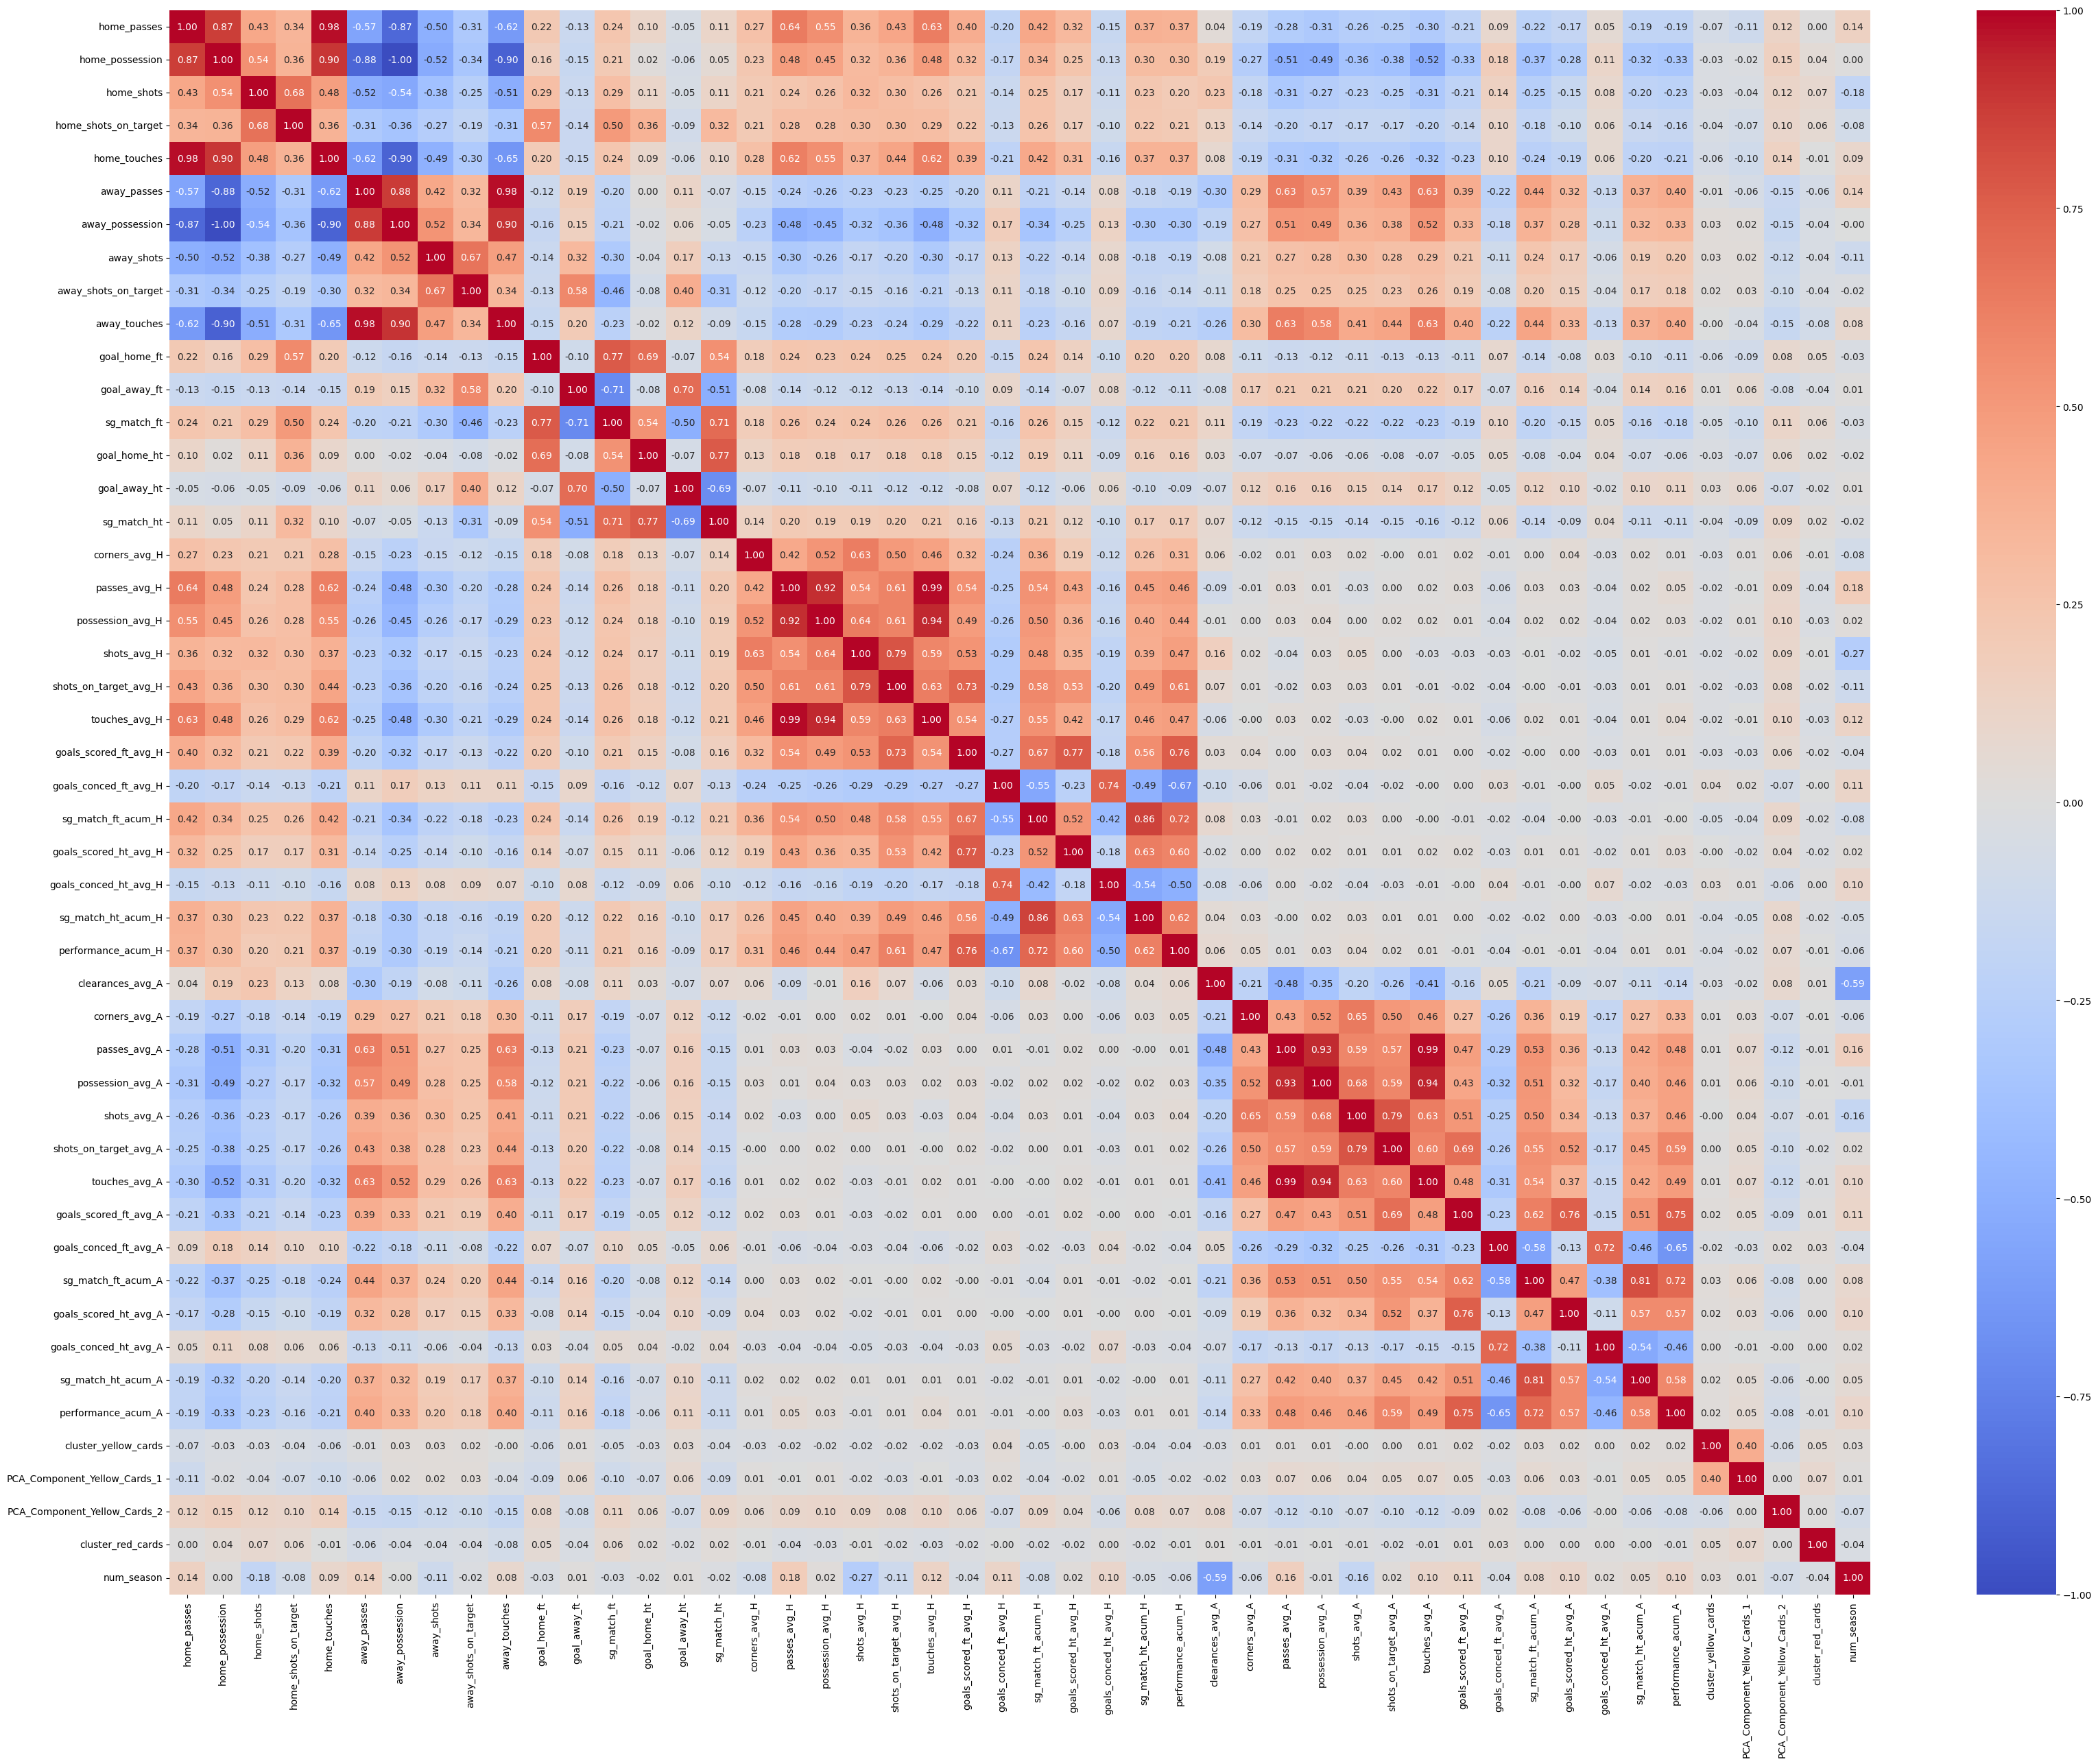

In [ ]:
matriz_de_correlacion = df.corr()
plt.figure(figsize=(40, 30))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
csv_name = "datasetLimpio60.csv"
df.to_csv(csv_name, index=False)

print(f"El archivo '{csv_name}' ha sido guardado con éxito.")

El archivo 'datasetLimpio60.csv' ha sido guardado con éxito.
